<a href="https://colab.research.google.com/github/Ashwin-113/Excel-PBL/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement:

Predict weather the user has gamming addiction or not


# Context:


# Content:
The dataset contains 40,034 entries capturing player behavior in online gaming. It includes demographic details, game-related metrics, and engagement indicators.

*   PlayerID: Unique identifier for each player.
*   Age: Age of the player.
*   Gender: Gender of the player.
*   Location: Geographic location of the player.
*   GameGenre: Genre of the game the player is engaged in.
*   PlayTimeHours: Average hours spent playing per session.
*   InGamePurchases: Indicates whether the player makes in-game purchases (0 =
    No, 1 = Yes).
*   GameDifficulty: Difficulty level of the game.
*   SessionsPerWeek: Number of gaming sessions per week.
*   AvgSessionDurationMinutes: Average duration of each gaming session in minutes.

*   PlayerLevel: Current level of the player in the game.
*   AchievementsUnlocked: Number of achievements unlocked by the player.
*   EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').
















In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Data
df=pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
df.describe().transpose()

count          mean           std          min  \
PlayerID                   40034.0  29016.500000  11556.964675  9000.000000   
Age                        40034.0     31.992531     10.043227    15.000000   
PlayTimeHours              40034.0     12.024365      6.914638     0.000115   
InGamePurchases            40034.0      0.200854      0.400644     0.000000   
SessionsPerWeek            40034.0      9.471774      5.763667     0.000000   
AvgSessionDurationMinutes  40034.0     94.792252     49.011375    10.000000   
PlayerLevel                40034.0     49.655568     28.588379     1.000000   
AchievementsUnlocked       40034.0     24.526477     14.430726     0.000000   

                                    25%           50%           75%  \
PlayerID                   19008.250000  29016.500000  39024.750000   
Age                           23.000000     32.000000     41.000000   
PlayTimeHours                  6.067501     12.008002     17.963831   
InGamePurchases                0.000000      0.000000      0.000000   
SessionsPerWeek                4.000000      9.000000     14.000000   
AvgSessionDurationMinutes     52.000000     95.000000    137.000000   
PlayerLevel                   25.000000     49.000000     74.000000   
AchievementsUnlocked          12.000000     25.000000     37.000000   

                                    max  
PlayerID                   49033.000000  
Age                           49.000000  
PlayTimeHours                 23.999592  
InGamePurchases                1.000000  
SessionsPerWeek               19.000000  
AvgSessionDurationMinutes    179.000000  
PlayerLevel                   99.000000  
AchievementsUnlocked          49.000000

In [ ]:
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [ ]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [ ]:
# Convert EngagementLevel column: 2 -> 0 and 1 -> 1
df['EngagementLevel'] = df['EngagementLevel'].replace({2: 0, 1: 1})

# Verify the conversion
print(df['EngagementLevel'].value_counts())

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


##Exploring the dataset

In [ ]:
# Identifying numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Printing the column names
print("Numeric Columns: ", numeric_cols)
print("Categorical Columns: ", categorical_cols)

Numeric Columns:  Index(['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases',
       'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
       'AchievementsUnlocked'],
      dtype='object')
Categorical Columns:  Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')


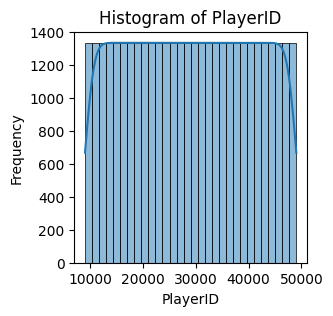

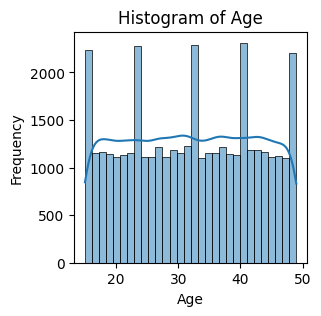

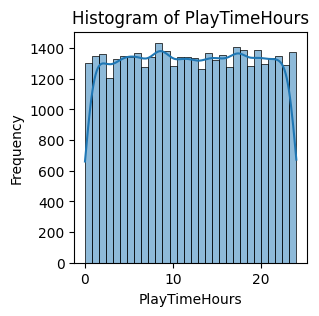

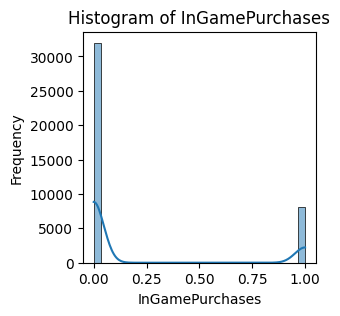

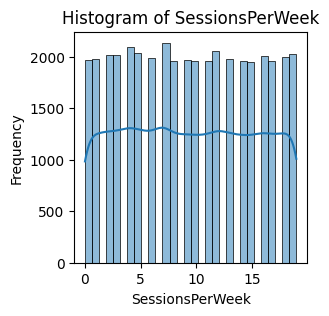

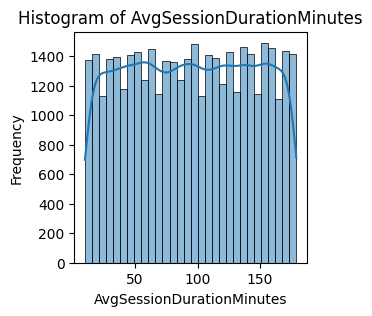

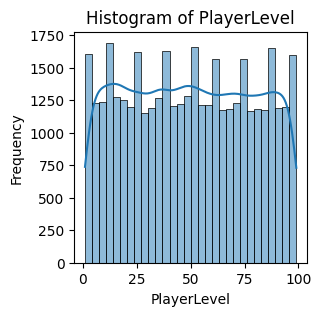

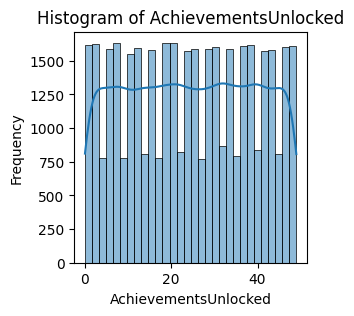

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Text(0, 0.5, 'Count of players')

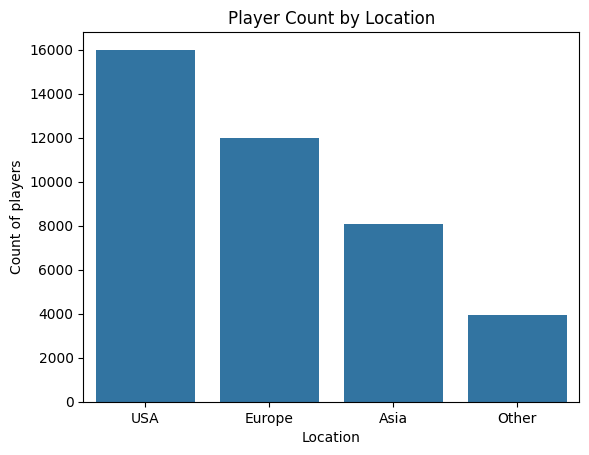

In [ ]:
sns.countplot(data=df,x="Location",order=df['Location'].value_counts().index)
plt.title(label='Player Count by Location')
plt.xlabel('Location')
plt.ylabel('Count of players')

Text(0, 0.5, 'Count of players')

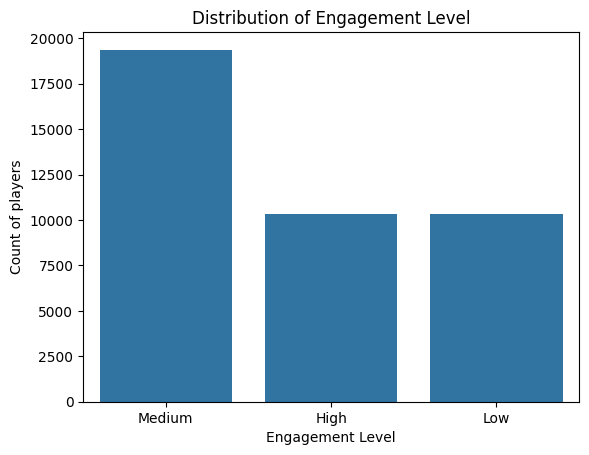

In [ ]:
sns.countplot(data=df,x="EngagementLevel",order=df['EngagementLevel'].value_counts().index)
plt.title(label='Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count of players')

Text(0, 0.5, 'Count of players')

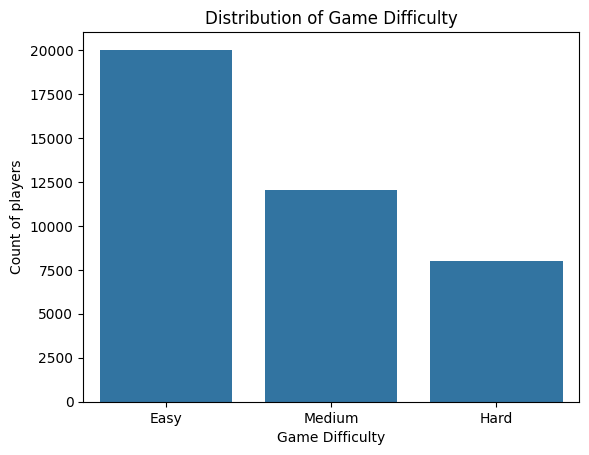

In [ ]:
sns.countplot(data=df,x="GameDifficulty",order=df['GameDifficulty'].value_counts().index)
plt.title(label='Distribution of Game Difficulty')
plt.xlabel('Game Difficulty')
plt.ylabel('Count of players')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Strategy'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'RPG'),
  Text(4, 0, 'Simulation')])

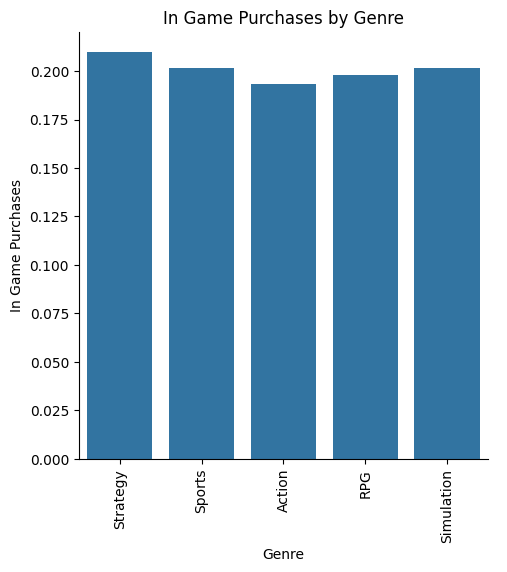

In [ ]:
sns.catplot(data=df,x="GameGenre",y="InGamePurchases",kind="bar",errorbar=None)
plt.title(label='In Game Purchases by Genre')
plt.xlabel('Genre')
plt.ylabel('In Game Purchases')
plt.xticks(rotation=90)

Text(0, 0.5, 'In Game Purchases')

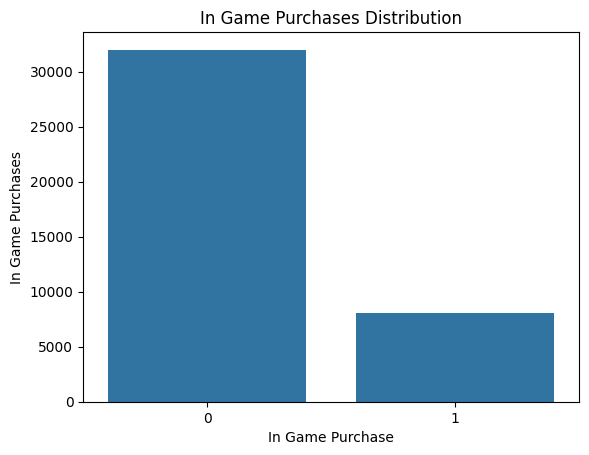

In [ ]:
sns.countplot(data=df,x="InGamePurchases")
plt.title(label='In Game Purchases Distribution')
plt.xlabel('In Game Purchase')
plt.ylabel('In Game Purchases')

Text(45.88226311728394, 0.5, 'Play Time (hrs)')

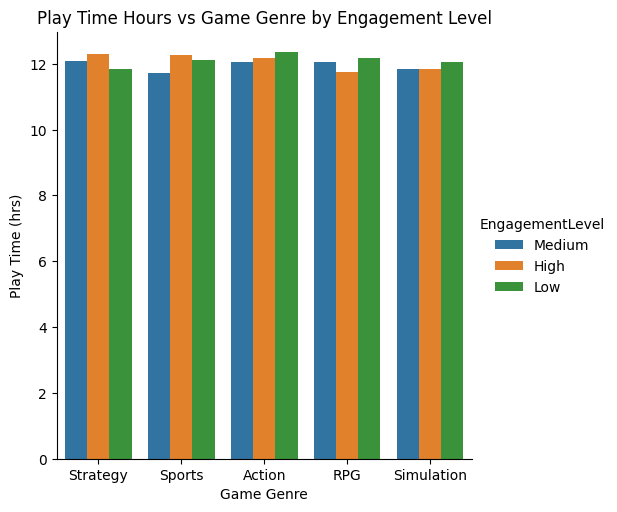

In [ ]:
sns.catplot(data=df,y="PlayTimeHours",x="GameGenre",hue="EngagementLevel",kind="bar",errorbar=None)
plt.title(label="Play Time Hours vs Game Genre by Engagement Level")
plt.xlabel('Game Genre')
plt.ylabel('Play Time (hrs)')

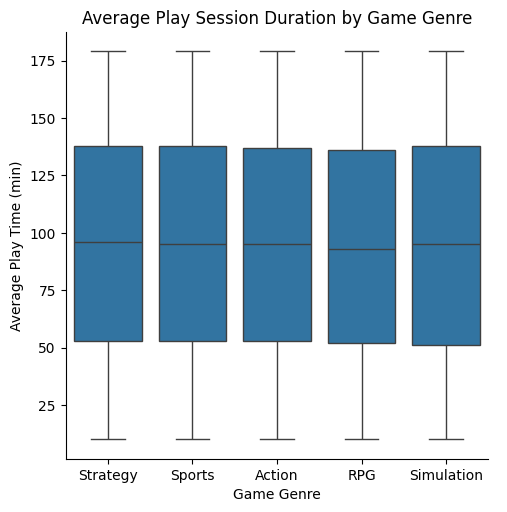

In [ ]:
sns.catplot(data=df,x="GameGenre",y="AvgSessionDurationMinutes",kind="box")
plt.title(label="Average Play Session Duration by Game Genre")
plt.xlabel('Game Genre')
plt.ylabel('Average Play Time (min)')
plt.show()

## Encoding

In [ ]:
#Creating copy of data to a new variables
ML_data = df.copy()

ll = LabelEncoder()

# Encoding categorical variables if needed
ML_data['Gender'] = ll.fit_transform(ML_data['Gender'])
ML_data['Location'] = ll.fit_transform(ML_data['Location'])
ML_data['GameGenre'] = ll.fit_transform(ML_data['GameGenre'])
ML_data['GameDifficulty'] = ll.fit_transform(ML_data['GameDifficulty'])
ML_data['EngagementLevel'] = ll.fit_transform(ML_data['EngagementLevel'])

## Splitting features and target

In [ ]:
x = ML_data.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = ML_data['EngagementLevel']
print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

Features (x) shape: (40034, 11)
Target (y) shape: (40034,)


In [ ]:
x.head()

Age  Gender  Location  GameGenre  PlayTimeHours  InGamePurchases  \
0   43       1         2          4      16.271119                0   
1   29       0         3          4       5.525961                0   
2   22       0         3          3       8.223755                0   
3   35       1         3          0       5.265351                1   
4   33       1         1          0      15.531945                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0               2                6                        108           79   
1               2                5                        144           11   
2               0               16                        142           35   
3               0                9                         85           57   
4               2                2                        131           95   

   AchievementsUnlocked  
0                    25  
1                    10  
2                    41  
3                    47  
4                    37

In [ ]:
y.head()

0    2
1    2
2    0
3    2
4    2
Name: EngagementLevel, dtype: int64

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.02,random_state=42)

##Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8077403245942572
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       205
           1       0.74      0.68      0.71       198
           2       0.80      0.86      0.83       398

    accuracy                           0.81       801
   macro avg       0.81      0.79      0.80       801
weighted avg       0.81      0.81      0.81       801



## Hypertunning

In [ ]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)
ac=accuracy_score(y_test,y_pred)
ac

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       205
           1       0.74      0.68      0.71       198
           2       0.80      0.86      0.83       398

    accuracy                           0.81       801
   macro avg       0.81      0.79      0.80       801
weighted avg       0.81      0.81      0.81       801



0.8077403245942572

In [ ]:
logreg=LogisticRegression(solver='newton-cg')
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)
ac=accuracy_score(y_test,y_pred)
ac

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       205
           1       0.74      0.68      0.71       198
           2       0.80      0.86      0.83       398

    accuracy                           0.81       801
   macro avg       0.81      0.79      0.80       801
weighted avg       0.81      0.81      0.81       801



0.8077403245942572

In [ ]:
logreg=LogisticRegression(solver='sag')
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)
ac=accuracy_score(y_test,y_pred)
ac

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       205
           1       0.74      0.68      0.71       198
           2       0.80      0.86      0.83       398

    accuracy                           0.81       801
   macro avg       0.81      0.79      0.80       801
weighted avg       0.81      0.81      0.81       801



0.8077403245942572

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report

accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8139825218476904
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       205
           1       0.74      0.76      0.75       198
           2       0.85      0.86      0.85       398

    accuracy                           0.81       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.81      0.81      0.81       801



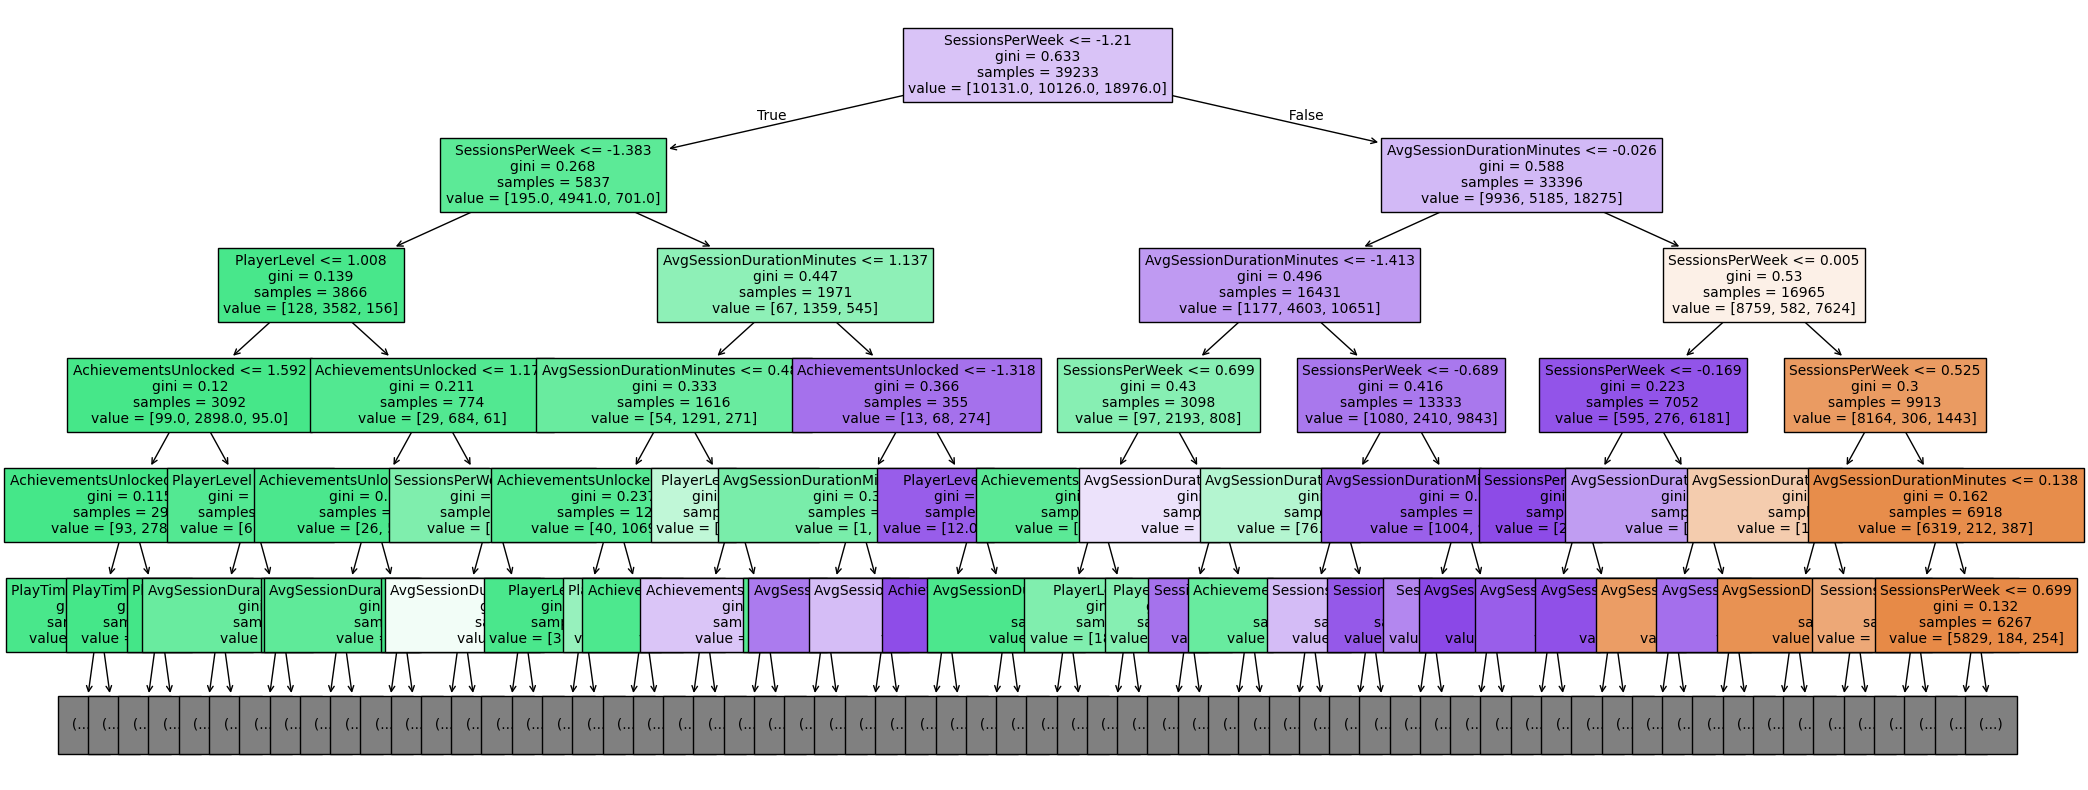

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt, max_depth = 5, feature_names =  x.columns, filled = True, fontsize = 10)
plt.show()
plt.savefig("DecisionTree.jpg")

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_test)

0.8139825218476904

## Prunning Techniques

## Max_Dept

In [ ]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    ypred=dt1.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print(f"at max_depth{i} accuracy is {ac}")

at max_depth1 accuracy is 0.8139825218476904
at max_depth2 accuracy is 0.8139825218476904
at max_depth3 accuracy is 0.8139825218476904
at max_depth4 accuracy is 0.8139825218476904
at max_depth5 accuracy is 0.8139825218476904
at max_depth6 accuracy is 0.8139825218476904
at max_depth7 accuracy is 0.8139825218476904
at max_depth8 accuracy is 0.8139825218476904
at max_depth9 accuracy is 0.8139825218476904
at max_depth10 accuracy is 0.8139825218476904
at max_depth11 accuracy is 0.8139825218476904
at max_depth12 accuracy is 0.8139825218476904
at max_depth13 accuracy is 0.8139825218476904
at max_depth14 accuracy is 0.8139825218476904
at max_depth15 accuracy is 0.8139825218476904
at max_depth16 accuracy is 0.8139825218476904
at max_depth17 accuracy is 0.8139825218476904
at max_depth18 accuracy is 0.8139825218476904
at max_depth19 accuracy is 0.8139825218476904
at max_depth20 accuracy is 0.8139825218476904
at max_depth21 accuracy is 0.8139825218476904
at max_depth22 accuracy is 0.81398252184769

In [ ]:
dt2=DecisionTreeClassifier(max_depth=3)
dt2.fit(x_train,y_train)
ypred=dt.predict(x_test)
print(classification_report(y_test,y_pred))
ac=accuracy_score(y_test,y_pred)
print(ac)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       205
           1       0.74      0.76      0.75       198
           2       0.85      0.86      0.85       398

    accuracy                           0.81       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.81      0.81      0.81       801

0.8139825218476904


In [ ]:
dt2.score(x_train,y_train)

0.8036092065353146

In [ ]:
dt2.score(x_test,y_test)

0.7428214731585518

##Min_Samples_split

In [ ]:
for i in range(32,100):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(x_train,y_train)
    ypred=dt3.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print(f"at min_samples_split{i} accuracy is {ac}")

at min_samples_split32 accuracy is 0.8139825218476904
at min_samples_split33 accuracy is 0.8139825218476904
at min_samples_split34 accuracy is 0.8139825218476904
at min_samples_split35 accuracy is 0.8139825218476904
at min_samples_split36 accuracy is 0.8139825218476904
at min_samples_split37 accuracy is 0.8139825218476904
at min_samples_split38 accuracy is 0.8139825218476904
at min_samples_split39 accuracy is 0.8139825218476904
at min_samples_split40 accuracy is 0.8139825218476904
at min_samples_split41 accuracy is 0.8139825218476904
at min_samples_split42 accuracy is 0.8139825218476904
at min_samples_split43 accuracy is 0.8139825218476904
at min_samples_split44 accuracy is 0.8139825218476904
at min_samples_split45 accuracy is 0.8139825218476904
at min_samples_split46 accuracy is 0.8139825218476904
at min_samples_split47 accuracy is 0.8139825218476904
at min_samples_split48 accuracy is 0.8139825218476904
at min_samples_split49 accuracy is 0.8139825218476904
at min_samples_split50 accur

In [ ]:
dt4=DecisionTreeClassifier(min_samples_split=190)    #Hypertunning the min_samples_split value to 190
dt4.fit(x_train,y_train)
ypred=dt4.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       205
           1       0.74      0.76      0.75       198
           2       0.85      0.86      0.85       398

    accuracy                           0.81       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.81      0.81      0.81       801



In [ ]:
dt4.score(x_train,y_train)

0.8992174954757475

In [ ]:
dt4.score(x_test,y_test)

0.8664169787765293

## Min_sample_leaf

In [ ]:
for i in range(1,30):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(x_train,y_train)
    ypred=dt5.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print(f"at min_samples_leaf{i} accuracy is {ac}")

at min_samples_leaf1 accuracy is 0.8139825218476904
at min_samples_leaf2 accuracy is 0.8139825218476904
at min_samples_leaf3 accuracy is 0.8139825218476904
at min_samples_leaf4 accuracy is 0.8139825218476904
at min_samples_leaf5 accuracy is 0.8139825218476904
at min_samples_leaf6 accuracy is 0.8139825218476904
at min_samples_leaf7 accuracy is 0.8139825218476904
at min_samples_leaf8 accuracy is 0.8139825218476904
at min_samples_leaf9 accuracy is 0.8139825218476904
at min_samples_leaf10 accuracy is 0.8139825218476904
at min_samples_leaf11 accuracy is 0.8139825218476904
at min_samples_leaf12 accuracy is 0.8139825218476904
at min_samples_leaf13 accuracy is 0.8139825218476904
at min_samples_leaf14 accuracy is 0.8139825218476904
at min_samples_leaf15 accuracy is 0.8139825218476904
at min_samples_leaf16 accuracy is 0.8139825218476904
at min_samples_leaf17 accuracy is 0.8139825218476904
at min_samples_leaf18 accuracy is 0.8139825218476904
at min_samples_leaf19 accuracy is 0.8139825218476904
at

In [ ]:
dt5.score(x_train,y_train)

0.9108148752325849

In [ ]:
dt5.score(x_test,y_test)

0.8764044943820225

In [ ]:
dt6=DecisionTreeClassifier(min_samples_leaf=100)
dt6.fit(x_train,y_train)
ypred=dt6.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       205
           1       0.74      0.76      0.75       198
           2       0.85      0.86      0.85       398

    accuracy                           0.81       801
   macro avg       0.80      0.80      0.80       801
weighted avg       0.81      0.81      0.81       801



In [ ]:
dt6.score(x_train,y_train)

0.8954196722147172

In [ ]:
dt6.score(x_test,y_test)

0.8664169787765293

## Random Forest

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[177  12  16]
 [  5 167  26]
 [  9  16 373]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801



##Boosting

In [ ]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ypred=ad.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801



In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
ypred=xgb.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801



##SVM

In [ ]:
svm=SVC()
def mymodel(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print(cr)
    print(ac)

In [ ]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801

0.8951310861423221


##HPT

In [ ]:
svm=SVC(kernel='sigmoid')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801

0.8951310861423221


In [ ]:
svm=SVC(kernel='linear')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       205
           1       0.86      0.84      0.85       198
           2       0.90      0.94      0.92       398

    accuracy                           0.90       801
   macro avg       0.89      0.88      0.89       801
weighted avg       0.90      0.90      0.89       801

0.8951310861423221


##KNN

In [ ]:
  df.EngagementLevel.value_counts()


EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

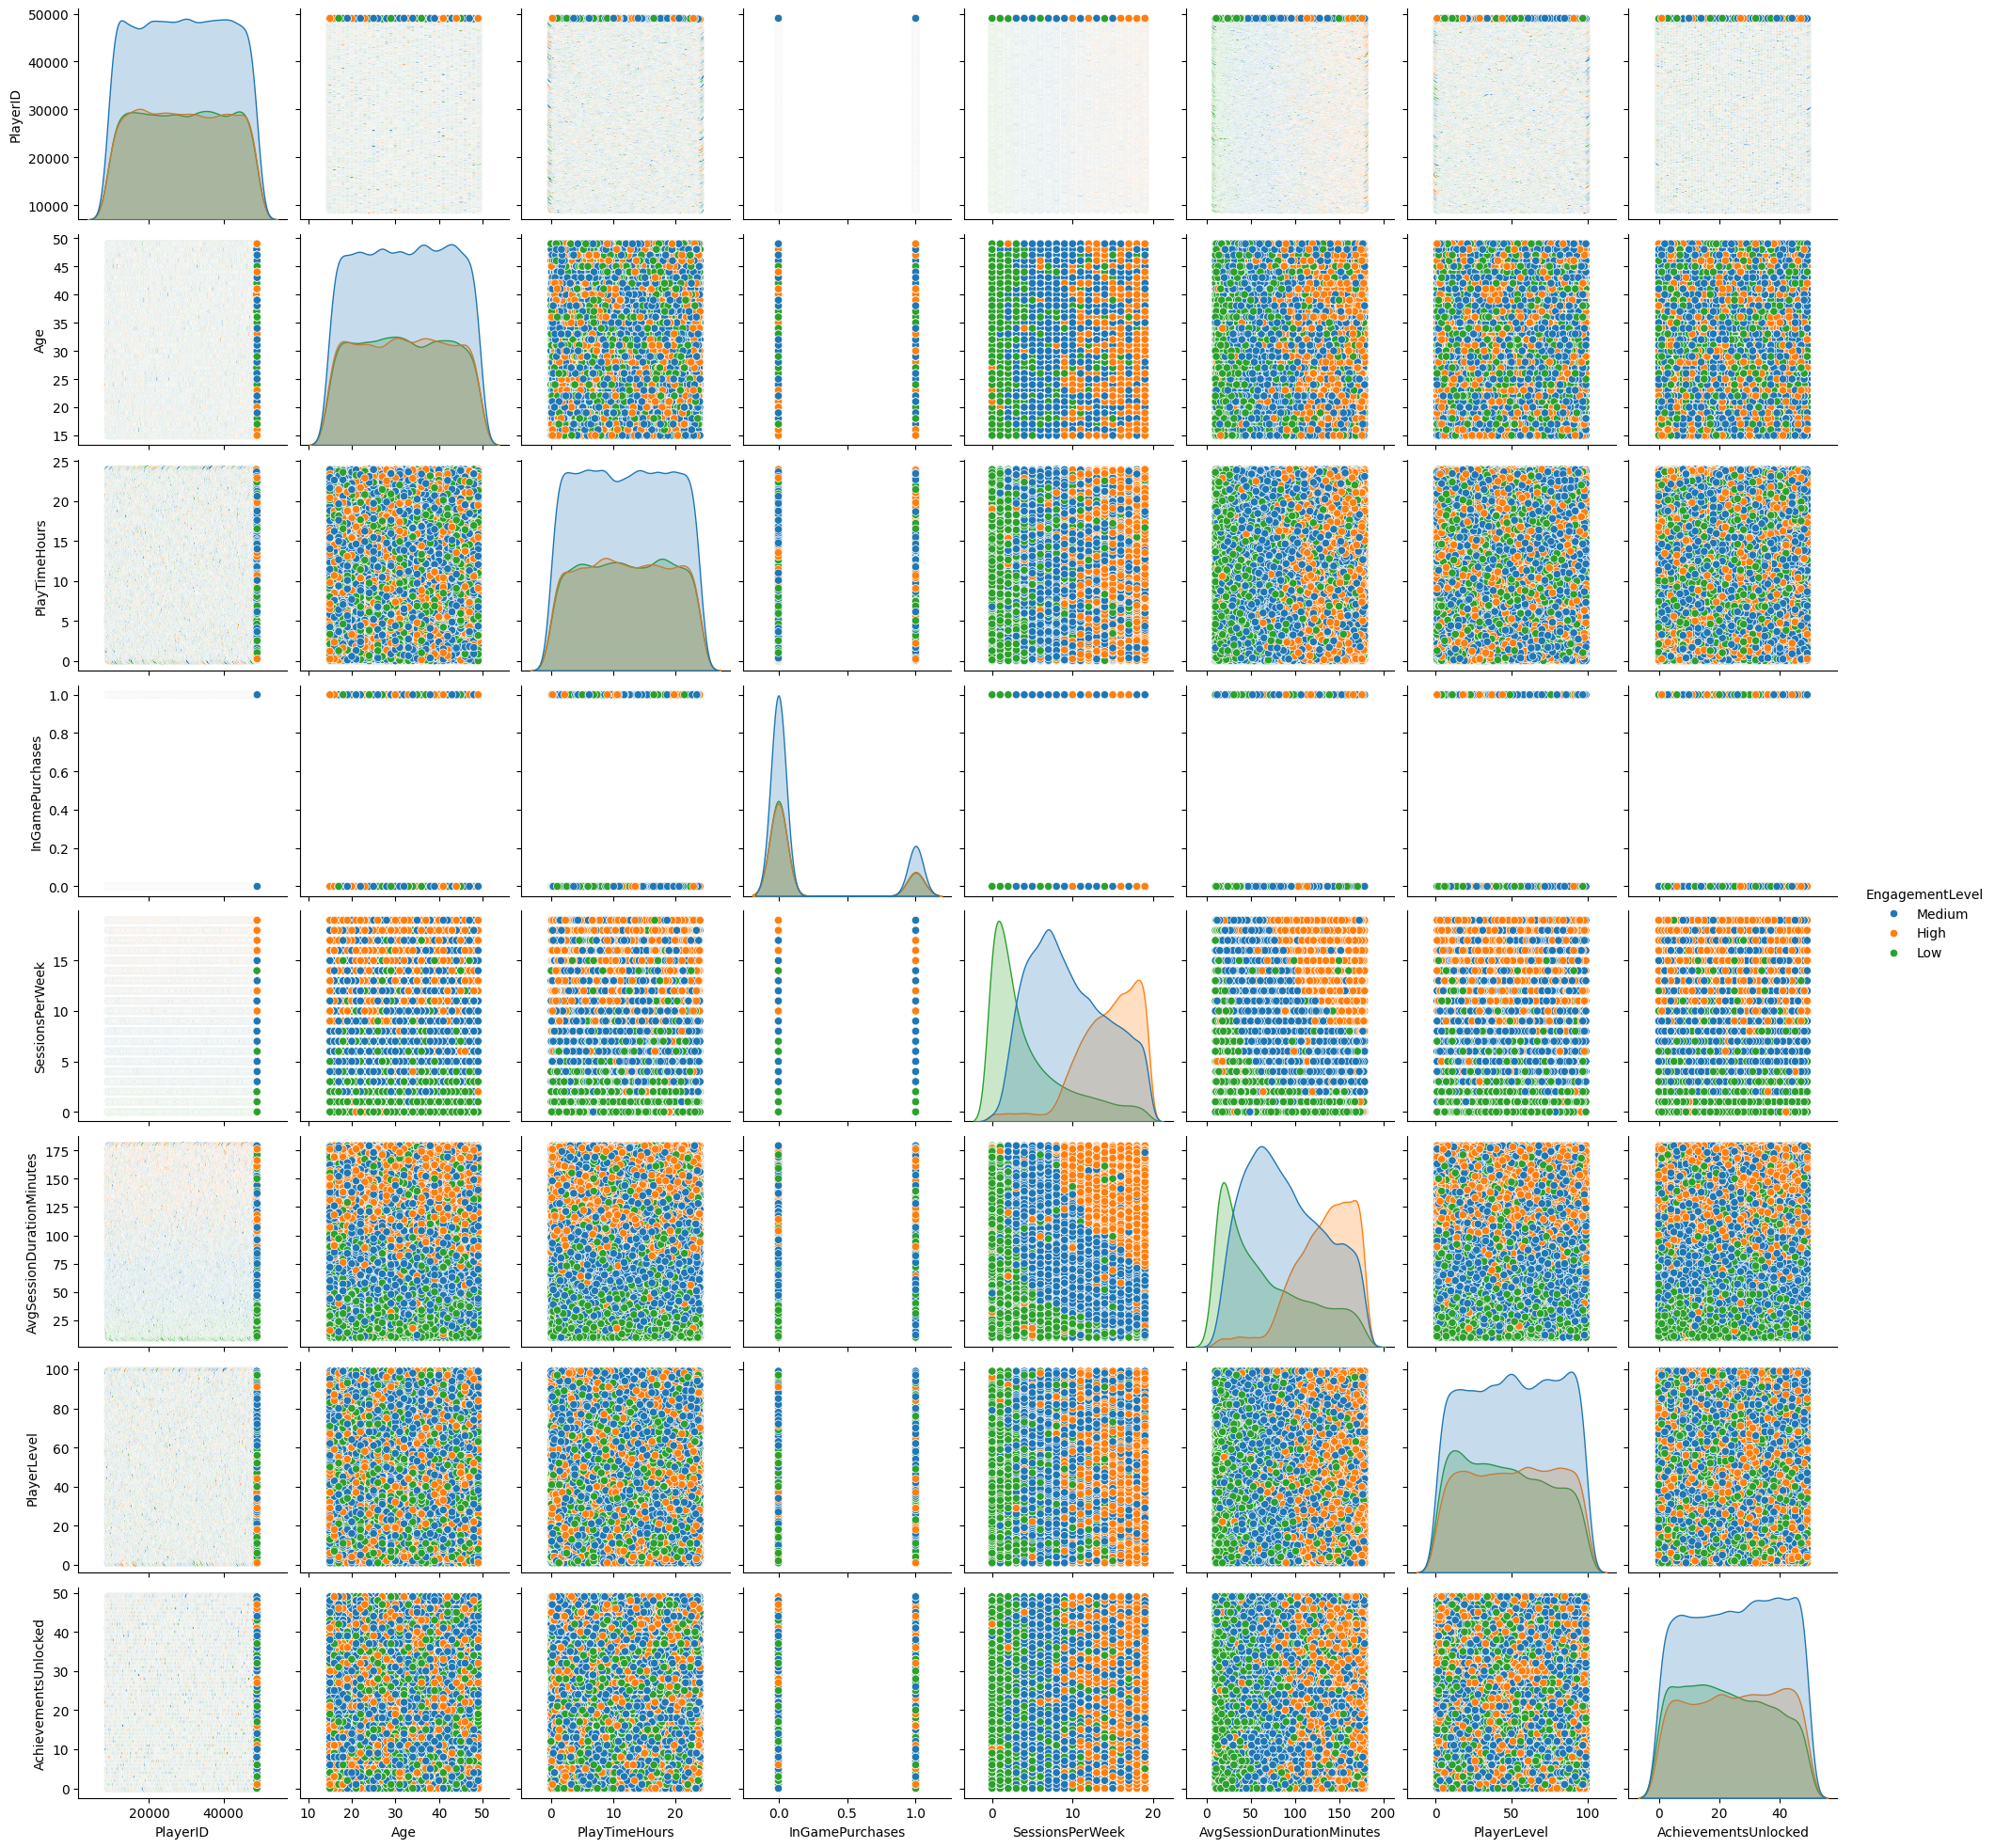

In [ ]:
sns.pairplot (df, hue='EngagementLevel')

In [ ]:
knn=KNeighborsClassifier (n_neighbors=5)   # n_neighbors is K value , bydefalut is 5.
knn.fit(x_train, y_train)
ypred=knn.predict (x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.8951310861423221

In [ ]:
acc_list=[]
for i in range (31,100):  # Take first 30 value , random dataset. You take any values. If range is change then value of K is also change.
    knn=KNeighborsClassifier (n_neighbors=i)
    knn.fit(x_train, y_train)
    ypred=knn.predict (x_test)

    ac=accuracy_score (y_test,y_pred)
    acc_list.append(ac)
acc_list

[0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861423221,
 0.8951310861

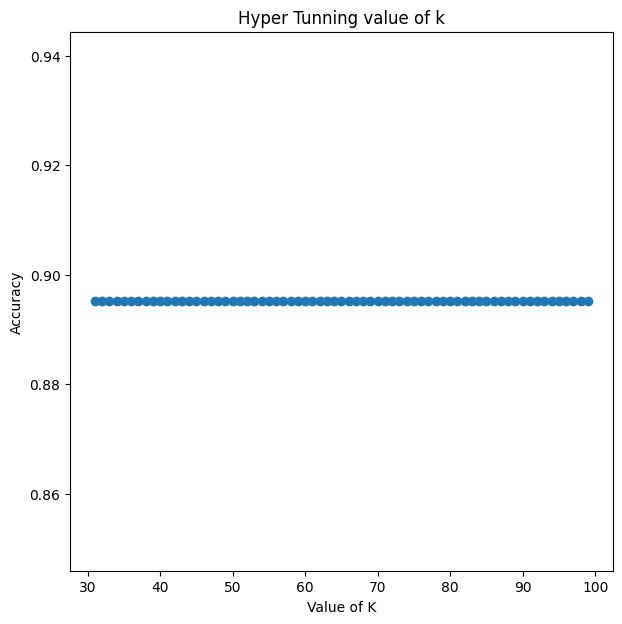

In [ ]:
plt.figure(figsize=(7, 7))
plt.title("Hyper Tunning value of k")
plt.plot(range(31, 100), acc_list, marker='o')
plt.xlabel('Value of K')
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier (n_neighbors=52)   # as per above K value is 52.
knn.fit(x_train, y_train)
ypred=knn.predict (x_test)
ac=accuracy_score (y_test, y_pred)
ac

0.8951310861423221